In [57]:
# INF 2178 Technical Assignment 4
# Jinhang Luo (1005124777)
# April 5st, 2024

In [60]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%pip install dfply
from dfply import *
%pip install pingouin
import pingouin as pg
from pingouin import ancova
from scipy.stats import shapiro, levene
%pip install nhanes
from statsmodels.stats.multicomp import MultiComparison
from nhanes.load import load_NHANES_data
import statsmodels.stats.power as smp
from statsmodels.formula.api import mixedlm

# Loading and read the dataset
data = pd.read_csv('INF2178_A4_data.csv')
# Check the data
data.info()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV       

In [61]:
# Cleanning process
# Dropping columns 
columns_to_drop = ['MR Delay','M/F','Hand','CDR','eTIV','ASF','SES','EDUC','Unnamed: 0','MRI ID']
data_new = data.drop(columns=columns_to_drop)
# Check whether missing values exist
print(data_new.isnull().sum())

Subject ID    0
Group         0
Visit         0
Age           0
MMSE          1
nWBV          0
dtype: int64


In [62]:
# Fill out the missing value with mean of MMSE
MMSE_mean = data_new['MMSE'].mean()
data_new['MMSE'].fillna(MMSE_mean, inplace=True)


# Check whether missing values exist again
print(data_new.isnull().sum())

# Check the cleaned new data(No missing data now in the cleaned data)
data_new.head(10)

Subject ID    0
Group         0
Visit         0
Age           0
MMSE          0
nWBV          0
dtype: int64


,Subject ID,Group,Visit,Age,MMSE,nWBV
0,OAS2_0001,Nondemented,1,87,27.0,0.696
1,OAS2_0001,Nondemented,2,88,30.0,0.681
2,OAS2_0002,Demented,1,75,23.0,0.736
3,OAS2_0002,Demented,2,76,28.0,0.713
4,OAS2_0004,Nondemented,1,88,28.0,0.710
5,OAS2_0004,Nondemented,2,90,27.0,0.718
6,OAS2_0005,Nondemented,1,80,28.0,0.712
7,OAS2_0005,Nondemented,2,83,29.0,0.711
8,OAS2_0007,Demented,1,71,28.0,0.748
9,OAS2_0008,Nondemented,1,93,30.0,0.698


In [63]:
# EDA
# Descriptive statistics
# Print description of the data
data_new.describe()

,Visit,Age,MMSE,nWBV
count,294.000000,294.000000,294.000000,294.000000
mean,1.489796,76.411565,27.259386,0.731381
std,0.500748,7.607074,3.407624,0.037373
min,1.000000,60.000000,15.000000,0.646000
25%,1.000000,71.000000,26.000000,0.703000
50%,1.000000,76.000000,29.000000,0.732000
75%,2.000000,81.000000,30.000000,0.756000
max,2.000000,98.000000,30.000000,0.837000


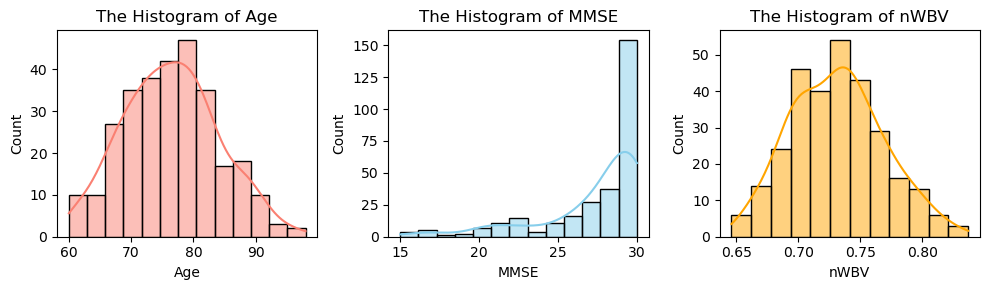

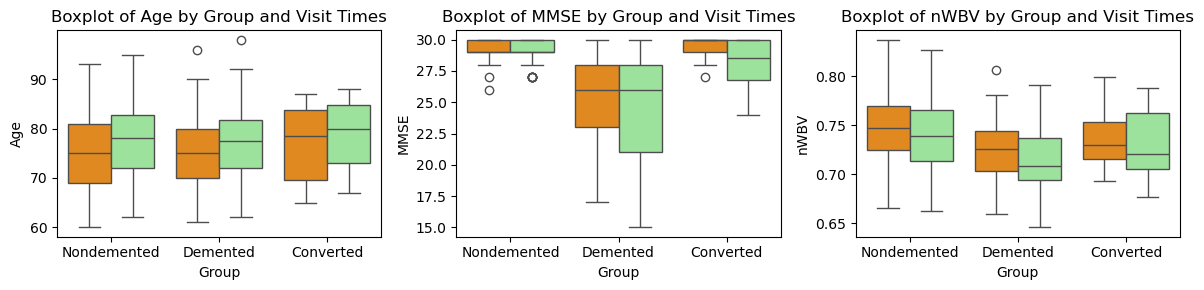

In [64]:
# Plot histograms
fig, axs = plt.subplots(1, 3, figsize=(10, 3)) 

sns.histplot(data=data_new, x="Age", ax=axs[0],kde=True,color='salmon')
axs[0].set_title('The Histogram of Age')  
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

sns.histplot(data=data_new, x="MMSE", ax=axs[1], kde=True,color='skyblue')
axs[1].set_title('The Histogram of MMSE')  
axs[1].set_xlabel('MMSE')
axs[1].set_ylabel('Count')

sns.histplot(data=data_new, x="nWBV", ax=axs[2],kde=True,color='orange')
axs[2].set_title('The Histogram of nWBV')  
axs[2].set_xlabel('nWBV')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Plot Boxplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3)) 
sns.boxplot(data=data_new,x='Group', y='Age', hue = 'Visit', palette=['#FF8C00','#90EE90'], ax=axs[0],legend=False)
axs[0].set_title('Boxplot of Age by Group and Visit Times')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('Age')

sns.boxplot(data=data_new,x='Group', y='MMSE', hue = 'Visit', palette=['#FF8C00','#90EE90'], ax=axs[1],legend=False)
axs[1].set_title('Boxplot of MMSE by Group and Visit Times')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('MMSE')

sns.boxplot(data=data_new,x='Group', y='nWBV', hue = 'Visit', palette=['#FF8C00','#90EE90'], ax=axs[2],legend=False)
axs[2].set_title('Boxplot of nWBV by Group and Visit Times')
axs[2].set_xlabel('Group')
axs[2].set_ylabel('nWBV')

plt.tight_layout()
plt.show()

/tmp/ipykernel_53/2398362598.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  point_plot1 = sns.pointplot(data=data_new, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'],


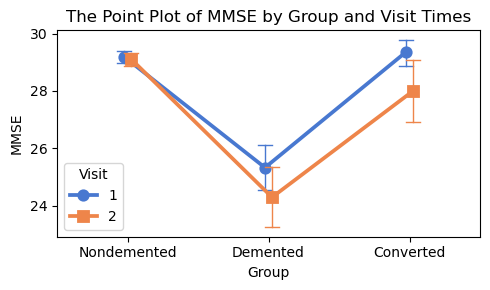

/tmp/ipykernel_53/2398362598.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  point_plot2 = sns.pointplot(data=data_new, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],


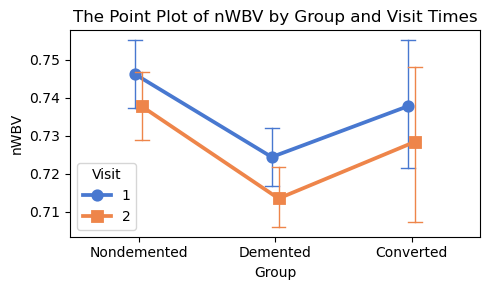

In [65]:
# Output plot
# MMSE across different groups and visits times
plt.figure(figsize=(5, 3))  # You can adjust the size as needed

point_plot1 = sns.pointplot(data=data_new, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='muted')
plt.title("The Point Plot of MMSE by Group and Visit Times")
plt.tight_layout()
plt.show()

# nWBV across different groups and visits times
plt.figure(figsize=(5, 3))  # You can adjust the size as needed

point_plot2 = sns.pointplot(data=data_new, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='muted')
plt.title("The Point Plot of nWBV by Group and Visit Times")
plt.tight_layout()
plt.show()
     

In [66]:
# Perform the Mixed-Effects ANOVA (MMSE & nWBV)

aov1 = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=data_new)
# Print of ANOVA summary
pg.print_table(aov1)

aov2 = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=data_new)
# Print of ANOVA summary
pg.print_table(aov2)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1322.017      2    141  661.009  56.100    0.000  0.443  nan
Visit          21.528      1    141   21.528   8.525    0.004  0.057    1.000
Interaction    16.204      2    141    8.102   3.208    0.043  0.044  nan


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [67]:
# Checking Assumptions
# Mauchly's test of sphericity

print (pg.sphericity(data=data_new, dv='MMSE', subject='Subject ID', within='Visit')[-1]) #model1
print(pg.sphericity(data=data_new, dv='nWBV', subject='Subject ID', within='Visit')[-1])  #model2

# Test of Normality
print(pg.normality(data=data_new, dv='MMSE', group='Group')) #model1
print(pg.normality(data=data_new, dv='nWBV', group='Group')) #model2

# Homogeneity of Variance(Levene's Test)

print(pg.homoscedasticity(data_new, dv="MMSE", group="Group")) #model1
print(pg.homoscedasticity(data_new, dv="nWBV", group="Group")) #model2

1.0
1.0
                    W          pval  normal
Group                                      
Nondemented  0.809528  2.635762e-12   False
Demented     0.928006  4.487420e-06   False
Converted    0.770938  5.867723e-05   False
                    W      pval  normal
Group                                  
Nondemented  0.988882  0.317042    True
Demented     0.990468  0.540290    True
Converted    0.958236  0.358018    True
                W          pval  equal_var
levene  64.643002  5.897159e-24      False
               W     pval  equal_var
levene  0.948773  0.38841       True


In [68]:
# Perform Statistical Power for T-Tests
# Import Required Modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# Factors for power analysis
alpha = 0.05
power = 0.91

# Perform Power Analysis to Find Sample Size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=0.7, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))


Sample size/Number needed in each group: 45.451


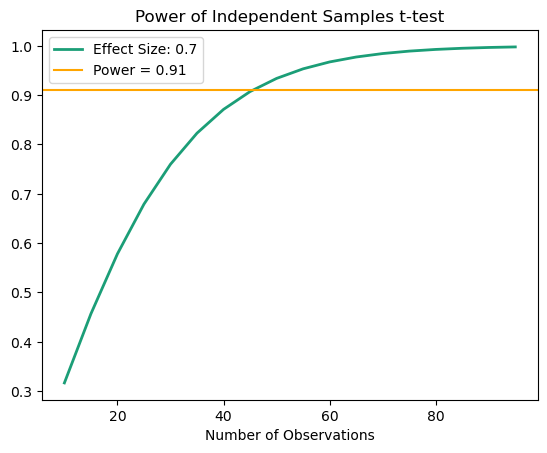

In [58]:
# Plot Power Analysis Plot
power_analysis = smp.TTestIndPower()

effect_sizes = np.array([0.7])
sample_sizes = np.array(range(10, 100, 5))
power = 0.91

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes,effect_size=effect_sizes, 
                                alpha=0.05, ax=ax, title='Power of Independent Samples t-test')

# Set Power level
ax.axhline(power, color='orange', linestyle='-')

# Create the legend 
legend_labels = [f'Effect Size: {i}' for i in effect_sizes] + [f'Power = 0.91']
ax.legend(legend_labels)     